In [11]:
# Importing Necessary Libraries
# Numerical libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.1 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=e434444382c116def990d15b9a5acbb84ac21fa9cea3c26b0fc9c04d6997c3d3
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=625c3672b0ebb0a382e1fe8194f7231bf3136e4b314df942373c33641850dbc3
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k
  Attempting uninstall: urllib3
    Found existin

# Data Loading and Integration

* Each group is assigned three sectors, as presented in the link below:
https://docs.google.com/spreadsheets/d/16-7e3dNk_h02Vd3F_BtrbrQ27dbO7pIe4d-N1kRrI24/edit?usp=sharing

* (4 pts) Your group must select ten stocks per sector (thirty stocks in total). You must grab daily data for your assets using Python (e.g., check the code at https://drive.google.com/file/d/1cQxGg7hdXfqMaUyBmYTk8kH9JTTwLLJR/view?usp=sharing).
HINT: If you update the Yahoo Finance code that has been provided to you and return monthly data, this becomes quite easy to implement:
Hint: just change interval='1mo' to interval='1d'
interval: {“1d”, “1wk”, “1mo”}. Refers to the interval to sample the data: “1d”= daily, “1wk”= weekly, “1mo”=monthly.
https://algotrading101.com/learn/yahoo-finance-api-guide/
* For training, you will use daily data from January 1, 2017 to December 31, 2021 (see below for details). For evaluating the performance of the strategies, you will use daily data from January 1, 2022 to December 31, 2022. You must check the quality of your data and, if necessary, clean it (i.e., remove entries of days for which information is missing) (-2 pts otherwise).
(3 pts) Present one time-series visualization (value of the stocks over time) per sector (so you will have three visualizations of time-series, one per sector).
(3 pts) Discuss what you see in each visualization plot (e.g., volatility over time).


In [13]:
# Assigning Stocks to tickers_list to scrape
tickers_list =  ['AMZN','TSLA','HD','TM','MCD','NKE','SBUX','LOW','BABA','F','HON','UNP','UPS','GE','CAT','RTX','BA','SIEGY','DE','LMT','AAPL','MSFT','NVDA','AVGO','ADBE','CSCO','ACN','CRM','AMD','INTU']


In [14]:
# # pull historical price data for each stocks to match with new score
# dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}
# dow_prices #printing it to check the historical data

In [15]:
# pull historical price data for each stocks to match with new score
dow_prices = {ticker : si.get_data(ticker,start_date = '12/01/2016',end_date='12/31/2021',interval='1d') for ticker in tickers_list}
dow_prices #printing it to check the historical data

{'AMZN':                   open        high         low       close    adjclose  \
 2016-12-01   37.620499   37.668499   36.901501   37.182499   37.182499   
 2016-12-02   37.169998   37.424500   36.834999   37.016998   37.016998   
 2016-12-05   37.250000   38.074501   37.099998   37.967999   37.967999   
 2016-12-06   38.199501   38.411999   37.862499   38.236000   38.236000   
 2016-12-07   38.227501   38.521000   37.791000   38.521000   38.521000   
 ...                ...         ...         ...         ...         ...   
 2021-12-23  170.427994  171.975006  170.149994  171.068497  171.068497   
 2021-12-27  171.037003  172.942993  169.215500  169.669495  169.669495   
 2021-12-28  170.182495  172.175995  169.135498  170.660995  170.660995   
 2021-12-29  170.839996  171.212006  168.600494  169.201004  169.201004   
 2021-12-30  169.699997  170.888000  168.524002  168.644501  168.644501   
 
               volume ticker  
 2016-12-01  93320000   AMZN  
 2016-12-02  71226000   AMZN

In [16]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the AMAZON (one sample)
prep_data = pd.DataFrame(dow_prices['AMZN']['adjclose']).rename(columns = {"adjclose":"AMZN"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data.head()

,AMZN,TSLA,HD,TM,MCD,NKE,SBUX,LOW,BABA,F,...,AAPL,MSFT,NVDA,AVGO,ADBE,CSCO,ACN,CRM,AMD,INTU
2016-12-01,37.182499,12.125333,109.416626,117.769997,100.337891,46.965115,50.816471,62.430290,89.860001,8.829710,...,25.474180,54.052616,21.597088,129.062576,99.510002,23.711897,105.625076,68.459999,8.39,107.388596
2016-12-02,37.016998,12.098000,109.754662,116.830002,100.143066,46.788944,49.687408,63.582184,90.480003,8.694744,...,25.569567,54.098263,21.796692,130.196274,99.730003,23.550869,105.292915,68.410004,8.53,107.284409
2016-12-05,37.967999,12.453333,109.594078,117.559998,101.032387,48.077812,49.939274,63.889915,90.989998,8.836812,...,25.385763,54.983921,22.641943,131.710571,101.949997,23.776310,105.678932,70.800003,8.68,108.828392
2016-12-06,38.236000,12.390000,108.799698,117.879997,100.998497,46.890934,49.887150,63.714054,90.400002,8.922056,...,25.581196,54.737396,23.014057,130.624405,101.550003,23.615276,106.298355,70.620003,9.45,108.487389
2016-12-07,38.521000,12.876667,111.943504,121.459999,101.565941,48.309628,51.033585,67.178520,91.070000,9.277234,...,25.832476,56.033939,23.428057,133.629196,103.360001,24.114479,109.135117,71.779999,9.56,110.457649


In [17]:
#Size of the data, checking rows and columns from the scraped data
x = prep_data.shape
print("Number of rows : ", x[0])
print("Number of stocks : ", x[1])

Number of rows :  1279
Number of stocks :  30


In [18]:
prep_data.isna().sum().sum() # Checking Null Values in the data

0

In [19]:
# create return features for each ticker,
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
return_data

,AMZN,TSLA,HD,TM,MCD,NKE,SBUX,LOW,BABA,F,...,AAPL,MSFT,NVDA,AVGO,ADBE,CSCO,ACN,CRM,AMD,INTU
2016-12-02,-0.004451,-0.002254,0.003089,-0.007982,-0.001942,-0.003751,-0.022218,0.018451,0.006900,-0.015285,...,0.003744,0.000844,0.009242,0.008784,0.002211,-0.006791,-0.003145,-0.000730,0.016686,-0.000970
2016-12-05,0.025691,0.029371,-0.001463,0.006248,0.008880,0.027546,0.005069,0.004840,0.005637,0.016340,...,-0.007188,0.016371,0.038779,0.011631,0.022260,0.009573,0.003666,0.034936,0.017585,0.014391
2016-12-06,0.007059,-0.005086,-0.007248,0.002722,-0.000335,-0.024687,-0.001044,-0.002753,-0.006484,0.009646,...,0.007699,-0.004484,0.016435,-0.008247,-0.003923,-0.006773,0.005861,-0.002542,0.088710,-0.003133
2016-12-07,0.007454,0.039279,0.028895,0.030370,0.005618,0.030255,0.022981,0.054375,0.007411,0.039809,...,0.009823,0.023687,0.017989,0.023003,0.017824,0.021139,0.026687,0.016426,0.011640,0.018161
2016-12-08,-0.004011,-0.004453,0.000528,0.011115,0.004420,-0.010556,-0.001872,-0.015183,0.013616,-0.002297,...,0.009817,-0.005866,-0.016725,0.012815,0.001354,0.000000,0.001399,0.001115,0.081590,0.009090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.000184,0.057619,0.003614,0.013344,0.003812,0.001390,0.005638,0.001562,0.007215,0.005462,...,0.003644,0.004472,0.008163,0.014652,0.010000,0.012189,-0.000941,0.001345,0.015707,0.006412
2021-12-27,-0.008178,0.025248,0.017679,0.011536,0.008610,0.011529,0.016464,0.014435,-0.017445,0.027161,...,0.022975,0.023186,0.044029,0.014260,0.014150,0.018304,0.029803,0.020384,0.056247,0.026836
2021-12-28,0.005844,-0.005000,0.005271,-0.006186,-0.001342,-0.006922,0.011819,0.001261,-0.015353,-0.001923,...,-0.005767,-0.003504,-0.020133,-0.007831,-0.014402,0.001734,-0.000145,-0.011034,-0.007839,-0.004581
2021-12-29,-0.008555,-0.002095,0.011373,-0.005792,0.002277,0.014181,0.007009,0.013975,-0.023606,-0.009634,...,0.000502,0.002051,-0.010586,0.005396,-0.000123,0.006768,0.000361,-0.003562,-0.031929,-0.002693


In [20]:
return_data.shape # Shape of the data after taking the difference of the data

(1278, 30)

# Data Visualization of the Time Series

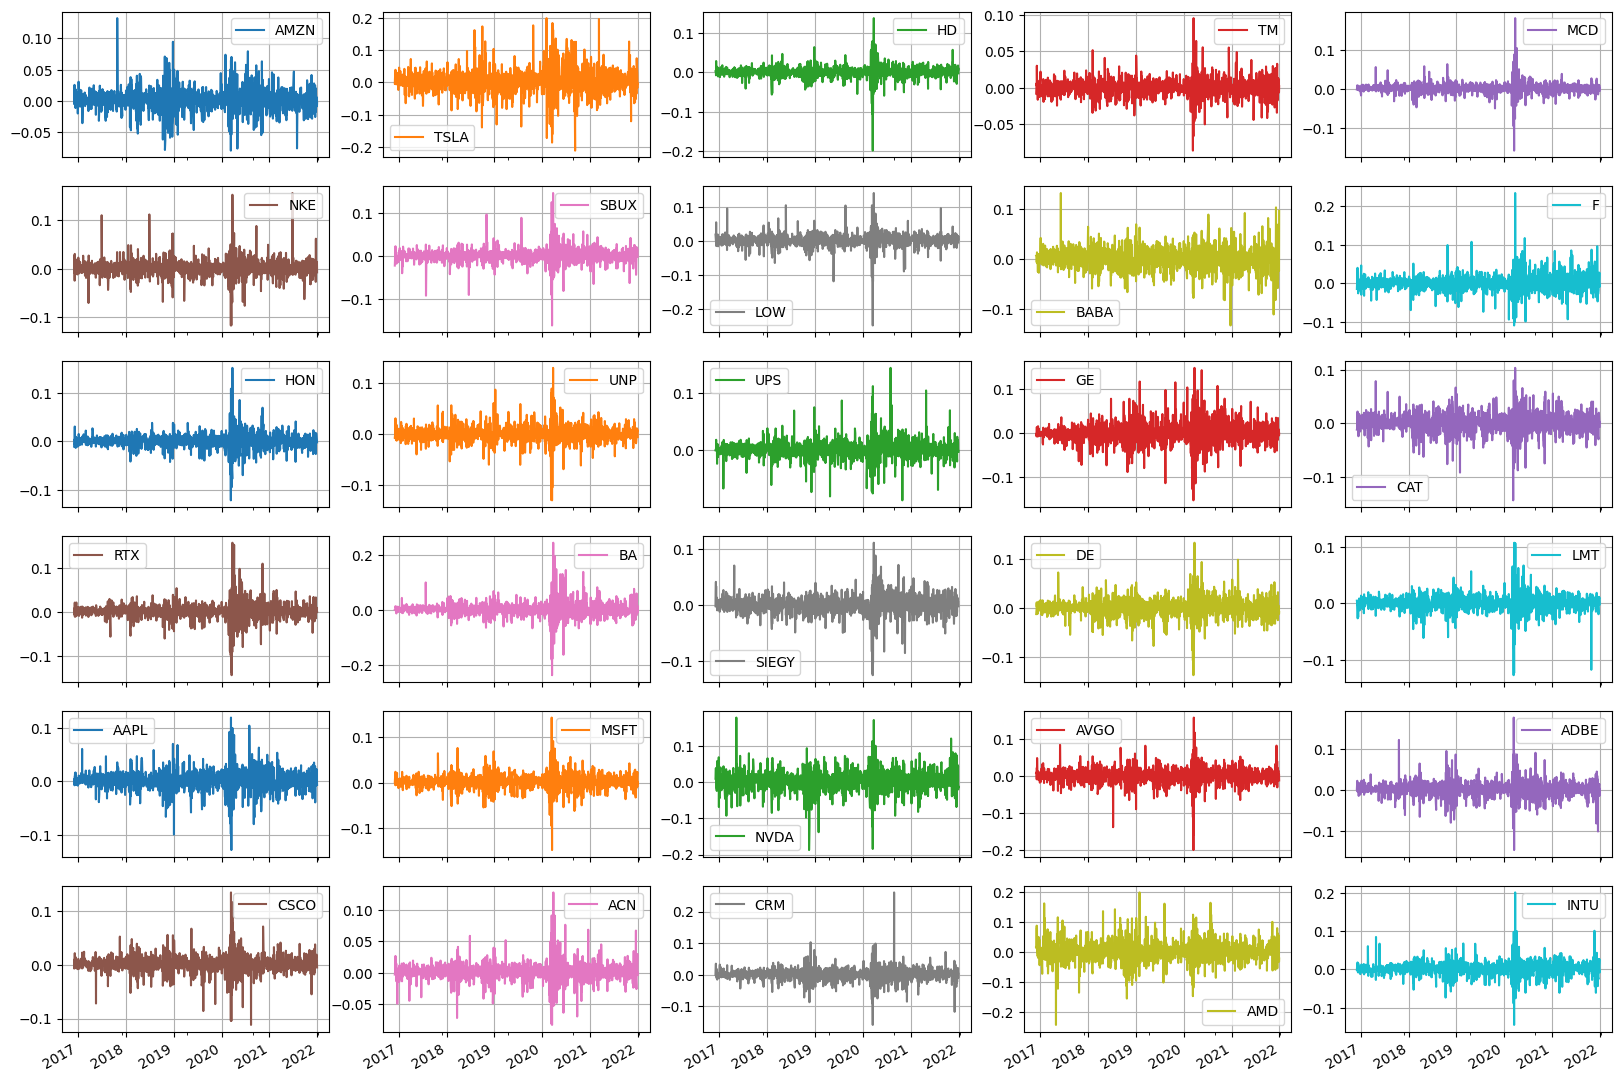

In [21]:
# Stock prices over the period of time
return_data.plot(subplots=True,
        grid=True,
        layout=(6,5),
         figsize=(20,15))
plt.show()

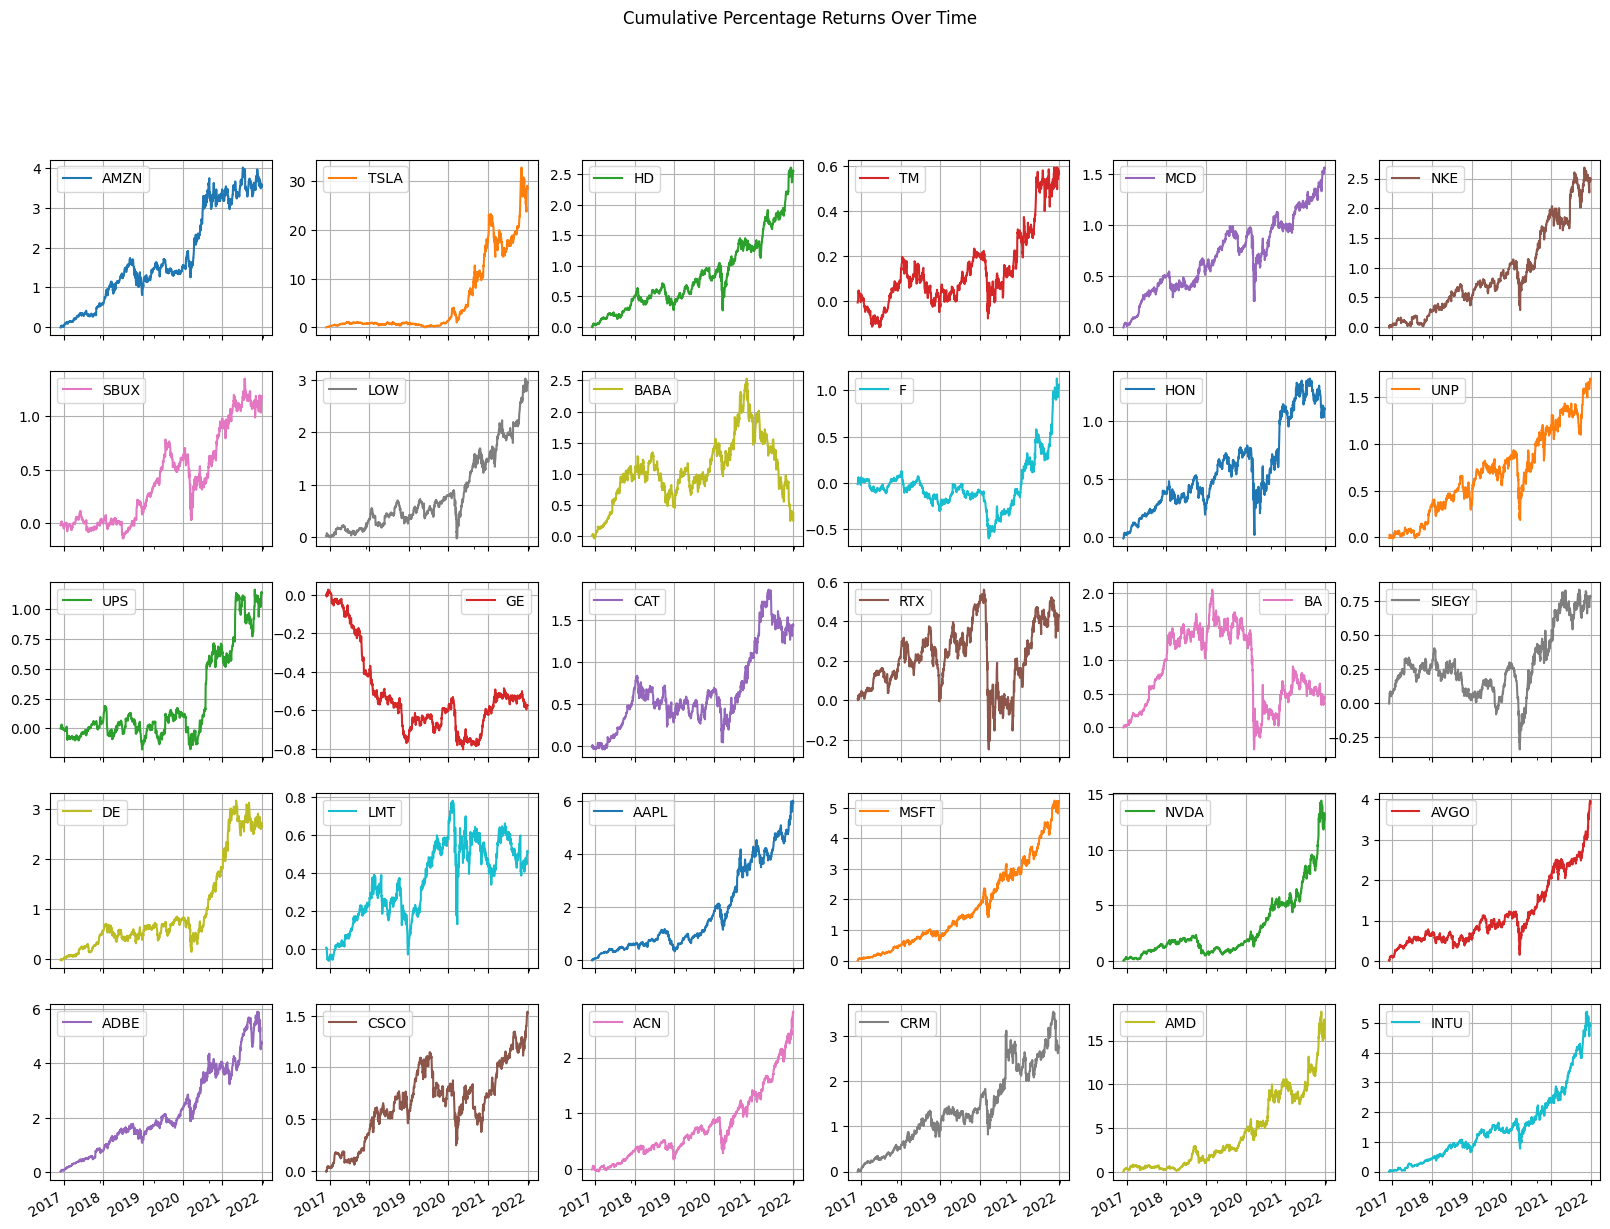

In [22]:
cumulative_returns = (1 + return_data).cumprod() - 1

# Plot the cumulative returns
cumulative_returns.plot(subplots=True,
                        grid=True,
                        layout=(5, 6),  # Adjust the layout as needed
                        figsize=(20, 15),
                        title="Cumulative Percentage Returns Over Time")

plt.show()

In [23]:
# done by Manas

# Momentum Trading for Stock Selection

* (15 pts) For each sector, you must apply the 8-21 Momentum Trading Strategy to each selected stock using daily data from the year 2021. We do not want to see 30 copies of the same code blocks, so you must use functions to keep your notebook concise (-7 pts otherwise).
* (5 pts) For each sector, you must plot the performance of the 8-21 Momentum Trading Strategy for each stock (i.e., one plot with ten curves, one per stock). More precisely, we want to see how the investment in each stock changed over time (like a traditional stock performance curve). Note that this plot differs from the ones in the Momentum Trading notebook!
* Present a conclusion for each sector and mention explicitly the top-three performing stocks of each sector; nine stocks will be mentioned in this discussion (-3 pts if this discussion is missing).



In [24]:
# should be done by Priyanka

In [25]:
prep_data.head()

,AMZN,TSLA,HD,TM,MCD,NKE,SBUX,LOW,BABA,F,...,AAPL,MSFT,NVDA,AVGO,ADBE,CSCO,ACN,CRM,AMD,INTU
2016-12-01,37.182499,12.125333,109.416626,117.769997,100.337891,46.965115,50.816471,62.430290,89.860001,8.829710,...,25.474180,54.052616,21.597088,129.062576,99.510002,23.711897,105.625076,68.459999,8.39,107.388596
2016-12-02,37.016998,12.098000,109.754662,116.830002,100.143066,46.788944,49.687408,63.582184,90.480003,8.694744,...,25.569567,54.098263,21.796692,130.196274,99.730003,23.550869,105.292915,68.410004,8.53,107.284409
2016-12-05,37.967999,12.453333,109.594078,117.559998,101.032387,48.077812,49.939274,63.889915,90.989998,8.836812,...,25.385763,54.983921,22.641943,131.710571,101.949997,23.776310,105.678932,70.800003,8.68,108.828392
2016-12-06,38.236000,12.390000,108.799698,117.879997,100.998497,46.890934,49.887150,63.714054,90.400002,8.922056,...,25.581196,54.737396,23.014057,130.624405,101.550003,23.615276,106.298355,70.620003,9.45,108.487389
2016-12-07,38.521000,12.876667,111.943504,121.459999,101.565941,48.309628,51.033585,67.178520,91.070000,9.277234,...,25.832476,56.033939,23.428057,133.629196,103.360001,24.114479,109.135117,71.779999,9.56,110.457649


# divide data into sectors

In [26]:
data_cds = prep_data.iloc[:,:10]
data_is = prep_data.iloc[:,10:20]
data_ts = prep_data.iloc[:,20:]

# Function to create all varibales of momentum trading

In [27]:
def create_MomentumTrading_columns(input_df):

  new_dataframe_ma = pd.DataFrame()

  for column in input_df.columns:
    new_column_name_8 = f"{column}_8_day"
    new_dataframe_ma[new_column_name_8] = input_df[column].rolling(8).mean().shift()
    new_column_name_21 = f"{column}_21_day"
    new_dataframe_ma[new_column_name_21] = input_df[column].rolling(21).mean().shift()
    new_column_name_log = f"{column}_log"
    new_dataframe_ma[new_column_name_log] = np.log(input_df[column])
  new_dataframe_ma = pd.concat([input_df, new_dataframe_ma], axis =1)

  new_dataframe_ma.dropna(inplace=True)

  new_dataframe_RI = pd.DataFrame()

  for column in input_df.columns:
    existing_column_name_log = f"{column}_log"
    new_column_name_return = f"{column}_return"
    new_dataframe_RI[new_column_name_return] = new_dataframe_ma[existing_column_name_log].diff()

    existing_column_name_8 = f"{column}_8_day"
    existing_column_name_21 = f"{column}_21_day"
    new_column_name_invested = f"{column}_invested"
    new_dataframe_RI[new_column_name_invested] = np.where(new_dataframe_ma[existing_column_name_8] > new_dataframe_ma[existing_column_name_21], 1,0)

  new_dataframe_RI.fillna(0, inplace=True)

  new_dataframe_RI = pd.concat([new_dataframe_ma, new_dataframe_RI], axis =1)


  new_dataframe_final = pd.DataFrame()

  for column in input_df.columns:
    existing_column_name_return = f"{column}_return"
    existing_column_name_invested = f"{column}_invested"

    new_column_name_systemReturn = f"{column}_system_return"
    new_dataframe_final[new_column_name_systemReturn] = new_dataframe_RI[existing_column_name_return] * new_dataframe_RI[existing_column_name_invested]

  new_dataframe_final = pd.concat([new_dataframe_RI, new_dataframe_final], axis =1)

  return new_dataframe_final

In [28]:
data_cds_final = create_MomentumTrading_columns(data_cds)
data_is_final = create_MomentumTrading_columns(data_is)
data_ts_final = create_MomentumTrading_columns(data_ts)

In [29]:
data_is_final.head(n=20)

,HON,UNP,UPS,GE,CAT,RTX,BA,SIEGY,DE,LMT,...,HON_system_return,UNP_system_return,UPS_system_return,GE_system_return,CAT_system_return,RTX_system_return,BA_system_return,SIEGY_system_return,DE_system_return,LMT_system_return
2017-01-03,96.498840,88.452118,92.120636,175.663864,79.011253,58.890774,145.533661,48.795624,93.566093,210.697357,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,96.764633,88.987053,92.144676,175.719315,78.658195,58.927959,147.063461,48.856140,95.157745,211.262955,...,0.002751,0.006030,0.000000,0.000316,-0.000000,0.000631,0.010457,0.001239,0.016868,0.000000
2017-01-05,96.980583,88.115646,92.192688,174.721512,78.179039,59.167061,147.146927,49.190994,94.735100,212.918259,...,0.002229,-0.009841,0.000000,-0.005695,-0.000000,0.004049,0.000567,0.006830,-0.004451,0.000000
2017-01-06,98.450745,89.030190,92.376808,175.220352,78.212654,59.804703,147.508484,49.259575,95.760239,214.473663,...,0.000000,0.000000,0.000000,0.002851,0.000000,0.010719,0.002454,0.001393,0.010763,0.000000
2017-01-09,97.636757,88.365829,91.872505,174.388916,77.649422,59.246769,146.785309,49.537949,94.591217,214.440384,...,-0.000000,-0.000000,-0.000000,-0.004756,-0.000000,-0.009373,-0.004915,0.005635,-0.012283,-0.000000
2017-01-10,97.885948,89.228630,91.192078,173.890015,78.876755,59.119251,147.480682,50.086624,94.321472,213.076263,...,0.000000,0.000000,-0.000000,-0.002865,0.000000,-0.002155,0.004726,0.011015,-0.002856,-0.006382
2017-01-11,98.018845,89.961990,91.400215,174.444397,79.566078,58.981110,147.786636,50.070480,95.058830,212.211227,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002339,0.002072,-0.000322,0.007787,-0.004068
2017-01-12,97.703232,90.332970,91.184097,174.000900,79.011253,58.885445,146.757492,49.921211,94.573250,210.123459,...,-0.003225,0.000000,-0.000000,-0.000000,-0.000000,-0.001623,-0.006988,-0.002986,-0.005121,-0.009887
2017-01-13,98.068657,90.807495,91.448227,173.834610,79.423180,58.566643,147.258163,49.945419,95.130775,211.712158,...,0.003733,0.000000,0.000000,-0.000000,0.000000,-0.005429,0.003406,0.000485,0.005878,0.007532
2017-01-17,97.370964,89.185486,91.312141,173.335693,78.658195,58.433807,146.182663,50.336746,93.826866,211.371140,...,-0.007140,-0.000000,-0.000000,-0.000000,-0.000000,-0.002271,-0.007330,0.007805,-0.013801,-0.001612


In [30]:
data_cds


,AMZN,TSLA,HD,TM,MCD,NKE,SBUX,LOW,BABA,F
2016-12-01,37.182499,12.125333,109.416626,117.769997,100.337891,46.965115,50.816471,62.430290,89.860001,8.829710
2016-12-02,37.016998,12.098000,109.754662,116.830002,100.143066,46.788944,49.687408,63.582184,90.480003,8.694744
2016-12-05,37.967999,12.453333,109.594078,117.559998,101.032387,48.077812,49.939274,63.889915,90.989998,8.836812
2016-12-06,38.236000,12.390000,108.799698,117.879997,100.998497,46.890934,49.887150,63.714054,90.400002,8.922056
2016-12-07,38.521000,12.876667,111.943504,121.459999,101.565941,48.309628,51.033585,67.178520,91.070000,9.277234
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,171.068497,355.666656,376.839203,183.779999,254.365372,161.817307,107.505814,240.497604,118.660004,17.747189
2021-12-27,169.669495,364.646667,383.501434,185.899994,256.555573,163.682907,109.275749,243.969162,116.589996,18.229214
2021-12-28,170.660995,362.823334,385.522949,184.750000,256.211273,162.549866,110.567299,244.276871,114.800003,18.194159
2021-12-29,169.201004,362.063324,389.907562,183.679993,256.794739,164.854996,111.342247,247.690735,112.089996,18.018877


# Function to see the return values from Momentum trading and plot

In [31]:
def return_values_MomentumTrading(input_df, final_df):
  import matplotlib.pyplot as plt
  for column in input_df.columns:
    name = f"{column}"
    column_name = f"{column}_system_return"
    print("The return value for stock ",name , " is : " , np.exp(np.sum(final_df[column_name])) - 1)
    plt.plot(np.exp(final_df[column_name]).cumprod(), label = name)

  plt.legend(loc=2)
  plt.grid(True, alpha=.3)
  plt.show()


# Function Call

The return value for stock  AMZN  is :  1.6338406193821524
The return value for stock  TSLA  is :  11.146642491123746
The return value for stock  HD  is :  1.5979619370784612
The return value for stock  TM  is :  -0.040512557280916295
The return value for stock  MCD  is :  0.5106167234359416
The return value for stock  NKE  is :  0.6985309591839308
The return value for stock  SBUX  is :  0.6377623371387227
The return value for stock  LOW  is :  2.144616089684918
The return value for stock  BABA  is :  0.6096827695814198
The return value for stock  F  is :  1.61796143054059


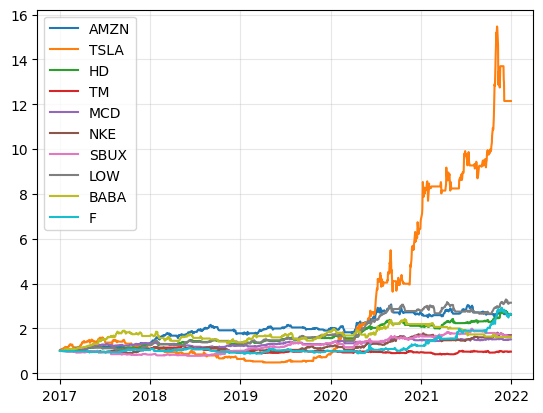

In [32]:
return_values_MomentumTrading(data_cds,data_cds_final)

## Best Stocks in Consumer Discretionary Sector :
> TSLA ; Low ; AMZN

The return value for stock  HON  is :  0.4246653380937855
The return value for stock  UNP  is :  0.4760054823648201
The return value for stock  UPS  is :  0.6426704227326081
The return value for stock  GE  is :  -0.1518984760579266
The return value for stock  CAT  is :  0.8932144325099636
The return value for stock  RTX  is :  -0.10838642716788527
The return value for stock  BA  is :  0.4750931586268592
The return value for stock  SIEGY  is :  0.26147838574917803
The return value for stock  DE  is :  1.1687238585846762
The return value for stock  LMT  is :  0.5874300546907572


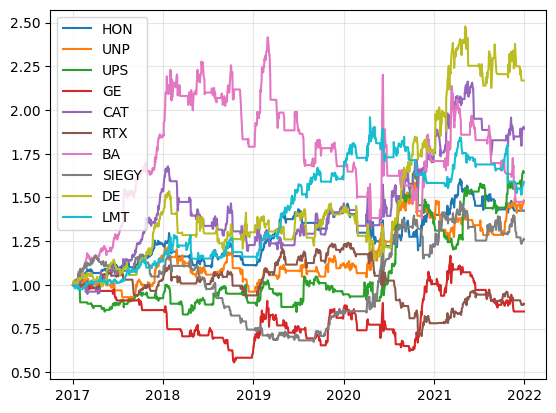

In [33]:
return_values_MomentumTrading(data_is,data_is_final)

## Best Stocks in Industrials Sector
> DE ; CAT ; UPS

The return value for stock  AAPL  is :  4.083783877762067
The return value for stock  MSFT  is :  1.2189039497432006
The return value for stock  NVDA  is :  4.458490877801903
The return value for stock  AVGO  is :  1.5257534364843055
The return value for stock  ADBE  is :  2.6208282719155944
The return value for stock  CSCO  is :  0.16287624297715864
The return value for stock  ACN  is :  1.785419300008817
The return value for stock  CRM  is :  0.4589229419403362
The return value for stock  AMD  is :  3.043822508603016
The return value for stock  INTU  is :  1.1657019256853296


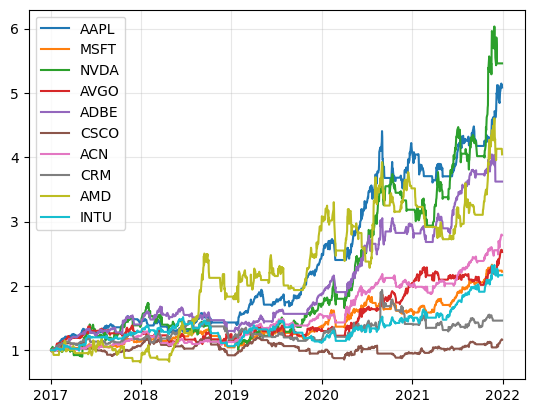

In [34]:
return_values_MomentumTrading(data_ts,data_ts_final)

## Best Stocks in Technology Sector
> NVDA ; AAPL ; AMD

# Optimization Model
* (10 pts) Run the portfolio allocation model for different and adequate risk levels using the nine stocks selected in the previous step. Namely, we want to see when the risk levels are too small and when the risk levels are too large. (Warning: the risk levels used in class may be too small or too big for your assets - you will need to test different ranges to find an adequate one).
You should consider at least 100 risk levels (-3 pts)
At least one risk level tested by your code must be discarded for being too small and leading to an infeasible problem (-3 pts).
You should not set any lower bound on the expected returns (-5 pts if you add such a constraint to your model - be careful with copy and paste!).
You should run the optimization model once per risk level only, i.e., your notebook should only have the code block that removes infeasible solutions  (-3 pts if the optimization model is unnecessarily executed for the same risk level more than once, e.g., without removing infeasible solutions - be careful with copy and paste!)
You should use daily data from January 1, 2017, to December 31, 2021, to train your model (-3 points if an incorrect period is used).
*(5 pts) Show how your allocation into different stocks will vary for different risk levels.
The plot must show the efficient frontier reaching the plateau (-2 pts)
The plateau should not be more than 25% of the plot (-2 pts)
The plot should not contain infeasible allocations (-2 pts)
The plot must have a legend (-2 pts)
The plot must show the results of at least 80% of the risk levels (-2 pts)
* (5 pts) Show the shape of the efficient frontier for different risk levels.
The plot must show the efficient frontier reaching the plateau (-2 pts)
The plateau should not be more than 25% of the plot (-2 pts)
The plot should not contain infeasible allocations (-2 pts)
The plot must have a legend (-2 pts)
The plot must show the results of at least 80% of the risk levels (-2 pts)
Select one of the portfolio allocations returned by the optimization model containing exactly three stocks (-3 points if fewer or more assets are used). The set of stocks and the allocation must be extracted from the MPT model (-3 points if another allocation is used; minor roundings are acceptable). This portfolio allocation will be used in the analysis.


In [35]:
# Atharva

In [36]:
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
Downloading...
From: https://drive.google.com/uc?id=10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
To: /content/ipopt-linux64_dw.zip
100% 1.82M/1.82M [00:00<00:00, 161MB/s]


In [37]:
start_date = '2017-01-01'
end_date = '2021-12-31'
selected_stocks = ['TSLA', 'LOW', 'AMZN', 'DE', 'CAT', 'UPS','NVDA','AAPL', 'AMD']
df_model = return_data.loc[start_date:end_date]

df_model = df_model[selected_stocks]
df_model

,TSLA,LOW,AMZN,DE,CAT,UPS,NVDA,AAPL,AMD
2017-01-03,0.015443,-0.002390,0.005068,0.009802,0.013478,0.003838,-0.044313,0.002849,0.007937
2017-01-04,0.046085,0.012121,0.004657,0.017011,-0.004468,0.000261,0.023331,-0.001119,0.000000
2017-01-05,-0.001057,-0.010305,0.030732,-0.004442,-0.006092,0.000521,-0.025386,0.005085,-0.016623
2017-01-06,0.009967,-0.001689,0.019912,0.010821,0.000430,0.001997,0.013367,0.011148,0.007117
2017-01-09,0.009912,0.001691,0.001168,-0.012208,-0.007201,-0.005459,0.040543,0.009160,0.015018
...,...,...,...,...,...,...,...,...,...
2021-12-23,0.057619,0.001562,0.000184,0.006398,0.020034,0.017991,0.008163,0.003644,0.015707
2021-12-27,0.025248,0.014435,-0.008178,0.004381,0.000873,0.013761,0.044029,0.022975,0.056247
2021-12-28,-0.005000,0.001261,0.005844,-0.002794,0.001163,-0.001999,-0.020133,-0.005767,-0.007839
2021-12-29,-0.002095,0.013975,-0.008555,-0.011608,0.003437,-0.000373,-0.010586,0.000502,-0.031929


In [38]:
Avg_Return = pd.DataFrame(np.mean(df_model) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(df_model) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
TSLA    0.003282
LOW     0.001300
AMZN    0.001367
DE      0.001217
CAT     0.000933
UPS     0.000765
NVDA    0.002367
AAPL    0.001678
AMD     0.002654
      Std_Dev_Return
TSLA        0.038006
LOW         0.020195
AMZN        0.018531
DE          0.019769
CAT         0.019657
UPS         0.017308
NVDA        0.029646
AAPL        0.019173
AMD         0.035389


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [39]:
df_model_cov = df_model.cov()
df_model_cov

,TSLA,LOW,AMZN,DE,CAT,UPS,NVDA,AAPL,AMD
TSLA,0.001446,0.000236,0.000258,0.000181,0.000152,0.000109,0.000448,0.000297,0.000435
LOW,0.000236,0.000408,0.000128,0.000208,0.000182,0.000144,0.000263,0.000184,0.000223
AMZN,0.000258,0.000128,0.000344,0.000117,0.000120,0.000116,0.000317,0.000225,0.000310
DE,0.000181,0.000208,0.000117,0.000391,0.000292,0.000144,0.000242,0.000168,0.000219
CAT,0.000152,0.000182,0.000120,0.000292,0.000387,0.000156,0.000232,0.000159,0.000207
UPS,0.000109,0.000144,0.000116,0.000144,0.000156,0.000300,0.000197,0.000146,0.000184
NVDA,0.000448,0.000263,0.000317,0.000242,0.000232,0.000197,0.000880,0.000341,0.000669
AAPL,0.000297,0.000184,0.000225,0.000168,0.000159,0.000146,0.000341,0.000368,0.000321
AMD,0.000435,0.000223,0.000310,0.000219,0.000207,0.000184,0.000669,0.000321,0.001253


In [40]:
df_model_cov = df_model.cov()
print('Covariance Matrix:')
print(df_model_cov)
print('\n')

df_model_return = df_model.mean()
print('Average Return:')
print(df_model_return)

Covariance Matrix:
          TSLA       LOW      AMZN        DE       CAT       UPS      NVDA  \
TSLA  0.001446  0.000236  0.000258  0.000181  0.000152  0.000109  0.000448   
LOW   0.000236  0.000408  0.000128  0.000208  0.000182  0.000144  0.000263   
AMZN  0.000258  0.000128  0.000344  0.000117  0.000120  0.000116  0.000317   
DE    0.000181  0.000208  0.000117  0.000391  0.000292  0.000144  0.000242   
CAT   0.000152  0.000182  0.000120  0.000292  0.000387  0.000156  0.000232   
UPS   0.000109  0.000144  0.000116  0.000144  0.000156  0.000300  0.000197   
NVDA  0.000448  0.000263  0.000317  0.000242  0.000232  0.000197  0.000880   
AAPL  0.000297  0.000184  0.000225  0.000168  0.000159  0.000146  0.000341   
AMD   0.000435  0.000223  0.000310  0.000219  0.000207  0.000184  0.000669   

          AAPL       AMD  
TSLA  0.000297  0.000435  
LOW   0.000184  0.000223  
AMZN  0.000225  0.000310  
DE    0.000168  0.000219  
CAT   0.000159  0.000207  
UPS   0.000146  0.000184  
NVDA  0.000

In [41]:
m = ConcreteModel()
selected_stocks = ['TSLA', 'LOW', 'AMZN', 'DE', 'CAT', 'UPS','NVDA','AAPL', 'AMD']
# defining variables
m.TSLA = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.LOW = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.AMZN = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.DE = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.CAT = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.UPS = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.NVDA = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.AAPL = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.AMD = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)

# Binary variables
m.bTSLA = Var(domain = Binary)
m.bLOW = Var(domain = Binary)
m.bAMZN = Var(domain = Binary)
m.bDE = Var(domain = Binary)
m.bCAT = Var(domain = Binary)
m.bUPS = Var(domain = Binary)
m.bNVDA = Var(domain = Binary)
m.bAAPL = Var(domain = Binary)
m.bAMD = Var(domain = Binary)

In [42]:
m.objective = Objective(expr =
                        m.bTSLA*m.TSLA*df_model_return[0] +
                        m.bLOW*m.LOW*df_model_return[1] +
                        m.bAMZN*m.AMZN*df_model_return[2] +
                        m.bDE*m.DE*df_model_return[3] +
                        m.bCAT*m.CAT*df_model_return[4]+
                        m.bUPS*m.UPS*df_model_return[5]+
                        m.bNVDA*m.NVDA*df_model_return[6]+
                        m.bAAPL*m.AAPL*df_model_return[7]+
                        m.bAMD*m.AMD*df_model_return[8],
                        sense=maximize)



In [43]:
# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.TSLA + m.LOW	+ m.AMZN + m.DE +	m.CAT	+ m.UPS + m.NVDA + m.AAPL	+ m.AMD ==1)


# 2. choose one stock in each sector
m.proportion_1  = Constraint(expr = m.bTSLA + m.bLOW + m.bAMZN ==1)
m.proportion_2 = Constraint(expr = m.bDE + m.bCAT + m.bUPS ==1)
m.proportion_3 = Constraint(expr = m.bNVDA + m.bAAPL + m.bAMD ==1)


In [44]:
# creating calculations table for calculate the risk
def calc_risk():
  # this is a list of all investment allocations (proportion invested in each stock)
  proportions = [m.TSLA, m.LOW, m.AMZN, m.DE, m.CAT, m.UPS, m.NVDA, m.AAPL, m.AMD]
  risk_matrix = []

  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 9 stocks, there are 9*9 = 81 elements
  # sum these 81 elements up at the end! that's the total risk.
  for index, col in enumerate(df_model_cov.columns):
    i = 0
    risk = []
    for row in df_model_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum()



In [45]:
max_risk = 0.003
risk_limits = np.arange(0.00001, max_risk, 0.000005) # tiny steps

In [46]:
risk_limits

array([1.000e-05, 1.500e-05, 2.000e-05, 2.500e-05, 3.000e-05, 3.500e-05,
       4.000e-05, 4.500e-05, 5.000e-05, 5.500e-05, 6.000e-05, 6.500e-05,
       7.000e-05, 7.500e-05, 8.000e-05, 8.500e-05, 9.000e-05, 9.500e-05,
       1.000e-04, 1.050e-04, 1.100e-04, 1.150e-04, 1.200e-04, 1.250e-04,
       1.300e-04, 1.350e-04, 1.400e-04, 1.450e-04, 1.500e-04, 1.550e-04,
       1.600e-04, 1.650e-04, 1.700e-04, 1.750e-04, 1.800e-04, 1.850e-04,
       1.900e-04, 1.950e-04, 2.000e-04, 2.050e-04, 2.100e-04, 2.150e-04,
       2.200e-04, 2.250e-04, 2.300e-04, 2.350e-04, 2.400e-04, 2.450e-04,
       2.500e-04, 2.550e-04, 2.600e-04, 2.650e-04, 2.700e-04, 2.750e-04,
       2.800e-04, 2.850e-04, 2.900e-04, 2.950e-04, 3.000e-04, 3.050e-04,
       3.100e-04, 3.150e-04, 3.200e-04, 3.250e-04, 3.300e-04, 3.350e-04,
       3.400e-04, 3.450e-04, 3.500e-04, 3.550e-04, 3.600e-04, 3.650e-04,
       3.700e-04, 3.750e-04, 3.800e-04, 3.850e-04, 3.900e-04, 3.950e-04,
       4.000e-04, 4.050e-04, 4.100e-04, 4.150e-04, 

In [47]:
print('total number of risk ceilings used:',len(risk_limits))

total number of risk ceilings used: 598


In [61]:
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
for r in risk_limits:
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = calc_risk() <= r)
   #run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)




  result = result.write()
  # store our allocation proportions
  param_analysis[r] =  [m.TSLA(), m.LOW(), m.AMZN(), m.DE(), m.CAT(), m.UPS(), m.NVDA(), m.AAPL(), m.AMD()]
  # store our returns
  returns[r] =  m.TSLA()*df_model_return[0] + m.LOW()*df_model_return[1] + m.AMZN()*df_model_return[2] + m.DE()*df_model_return[3] + m.CAT()*df_model_return[4] + m.UPS()*df_model_return[5] + m.NVDA()*df_model_return[6] + m.AAPL()*df_model_return[7] +  m.AMD()*df_model_return[8]

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.0294954776763916
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.09138607978820801
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.050907135009765625
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03467273712158203
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03733563423156738
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.027905702590942383
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.06706070899963379
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.025477170944213867
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.025213241577148438
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.025200366973876953
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03345894813537598
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.0379636287689209
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.027575969696044922
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03226876258850098
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.031028270721435547
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.040158987045288086
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.04485464096069336
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.035872697830200195
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03727865219116211
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.027735233306884766
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.030480146408081055
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.027040481567382812
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03637218475341797
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.030020713806152344
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.022515296936035156
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03383207321166992
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.025167465209960938
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.0364232063293457
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03488659858703613
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.029658079147338867
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03356313705444336
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.04050445556640625
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.034234046936035156
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.039392948150634766
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number o

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03128528594970703
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


Streaming output truncated to the last 5000 lines.
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.017049551010131836
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------

In [62]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')

In [64]:
len(param_analysis) # number of feasible solutions

598

In [71]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['TSLA', 'LOW', 'AMZN', 'DE', 'CAT', 'UPS','NVDA','AAPL', 'AMD']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

TypeError: ignored

In [66]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[1e-05, 1.5000000000000002e-05, 2.0000000000000005e-05, 2.5000000000000005e-05, 3.0000000000000004e-05, 3.5000000000000004e-05, 4.000000000000001e-05, 4.500000000000001e-05, 5.000000000000001e-05, 5.500000000000001e-05, 6.000000000000001e-05, 6.500000000000002e-05, 7.000000000000002e-05, 7.500000000000002e-05, 8.000000000000002e-05, 8.500000000000002e-05, 9.000000000000002e-05, 9.500000000000002e-05, 0.00010000000000000002, 0.00010500000000000002, 0.00011000000000000002, 0.00011500000000000003, 0.00012000000000000003, 0.00012500000000000003, 0.00013000000000000004, 0.00013500000000000003, 0.00014000000000000004, 0.00014500000000000003, 0.00015000000000000004, 0.00015500000000000003, 0.00016000000000000004, 0.00016500000000000003, 0.00017000000000000004, 0.00017500000000000005, 0.00018000000000000004, 0.00018500000000000005, 0.00019000000000000004, 0.00019500000000000005, 0.00020000000000000004, 0.00020500000000000005, 0.00021000000000000004, 0.00021500000000000005, 0.000220000000000000

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
!pip install iteround
from iteround import saferound
from pylab import *


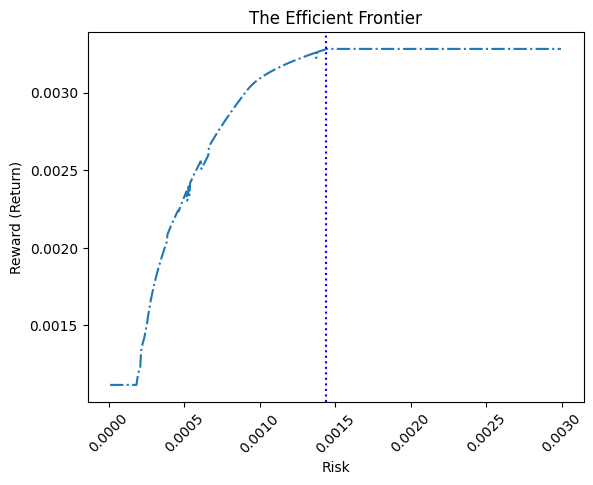

In [68]:
#Modeling finished
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.axvline(x = 0.0014385170450445183, color = 'b',linestyle = 'dotted', label = 'Chosen portfolio risk')
plt.xticks(rotation=45)
plt.show()

In [70]:
portfolio = pd.Series(saferound(param_analysis.loc[0.0014385170450445183],
                                    places = 3)) #  rounding to make sure they add up to 1

portfolio.index = param_analysis.columns

portfolio

KeyError: ignored

# Analysis

Let’s see how you would have applied the following investment strategies in 2022. You can suppose you have $100,000 to invest. You should use the portfolio allocation selected by the MPT model (-3 points if a different allocation is used). Fractional shares are okay, i.e., if the stock costs $100, but your allocation restricts the purchase to $50, you will buy 0.5 shares of this stock (this is not a simplification; this happens in practice!). Your solution will not be evaluated based on the returns of your portfolio, i.e., if you lose money, it’s OK!

*(5 pts) Buy-and-Hold strategy for the MPT portfolio: Create a table that shows the amount of money invested in each stock of your portfolio on the first day of each month (i.e., how much money is currently invested in each stock) as well as the aggregate value of the entire portfolio from Jan 1, 2022 (when you would have done your allocation), February 1, 2022 …, through December 1, 2022.
(10 pts) 8-21 Momentum trading strategy on the S&P 500 index (^GSPC): In this investment, you should apply the 8-21 Momentum Trading strategy to the S&P 500 index (^GSPC), as it was a stock. Create a table that shows the value of each position in your portfolio on the first day of each month (i.e., how much money is currently allocated to each stock) as well as the aggregate value of the entire portfolio from Jan 1, 2022 (when you would have done your allocation), February 1, 2022 …, through December 1, 2022. When computing the moving averages, you must consider the last days of 2021; therefore, in principle, your model should be able to buy the stocks on Jan 1, 2022 (deduction of 3 points if the last days of 2021 are not used).  
* (5 pts) Buy-and-Hold strategy for the S&P 500 index (^GSPC): Create a table that shows the amount of money invested in ^GSPC on the first day of each month (i.e., how much money is currently invested in each stock) as well as the aggregate value of the entire portfolio from Jan 1, 2022 (when you would have done your allocation), February 1, 2022 …, through December 1, 2022 (when we imagine you sold your stocks).
* (5 pts) Show the performance of each of the three strategies above in a single plot. Using the plot, compare and analyze the results obtained by the three strategies.  
Your plot must have a legend (-2 pts)
Your plot must have labels (-2 pts)


In [53]:
# Harit and Sai-Srinivas

# Conclusion

(5 pts) Provide some closing thoughts and insights (five to ten bullets) on what you have learned from your Models and the Analysis. We will deduct points if the conclusion has only obvious comments (e.g., “We used MPT to compute a portfolio allocation” is not an insight).
List each group member’s contribution to the project and effort, i.e., what each person did (-2 pts if absent).


In [54]:
# Anuja